In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [103]:
df = pd.read_csv('wiki-RfA.csv', index_col=0, parse_dates=['Date'])
df

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....


In [104]:
df[df['Year'] == 2003]

,Source,Target,Vote,Results,Year,Date,Comment
198072,Cyp,168...,1,1,2003,2003-11-30 23:12:00,Support 2³&times;3&times;7... [[User:Cyp|&#922...
198073,Maximus Rex,168...,1,1,2003,2003-12-01 00:52:00,Support -- a good contributor.
198074,Cyan,168...,1,1,2003,2003-12-01 18:25:00,Support. --
198075,Angela,168...,1,1,2003,2003-12-02 04:26:00,Support.
198076,Hephaestos,168...,1,1,2003,2003-12-02 15:45:00,Support. I've never seen 168 do anything but ...
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....


# Time series visualisation

### Handle missing data

In [105]:
voting_time = (df.groupby('Target').Date.apply(lambda x: x - x.min()).dt.total_seconds()/3600).rename('Voting_time')

# add voting time to df dataframe, merge on index
df_timeserie = df.join(voting_time.droplevel(0))
df_timeserie

,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,0.000000
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,1.850000
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,0.500000
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,0.966667
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1.716667
...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support,48.633333
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.,0.000000
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --,NaN
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....,197.883333


The voting_time series gives the time in minute at which each vote was cast compared to the first vote recorded for the same target (we consider this as the opening of the polls). Thus, for each target we should have a voting_time of 0.

In [106]:
# Convert Vote, Results and Year to int
df_timeserie['Vote'] = df_timeserie['Vote'].astype(int)
df_timeserie['Results'] = df_timeserie['Results'].astype(int)
df_timeserie['Year'] = df_timeserie['Year'].astype(int)

In [107]:
# Plot basic statistics
df_timeserie['Voting_time'].describe().round(2)

count    188907.00
mean       1915.66
std        5930.65
min           0.00
25%          10.43
50%          46.52
75%         157.34
max       72598.02
Name: Voting_time, dtype: float64

In [108]:
# Targets where all voting times are NaN
nan_target = set(df_timeserie.Target.unique()) - set(df_timeserie[~df_timeserie['Voting_time'].isna()].Target.unique())
print('Number of target without time data:', len(nan_target))
print('Target without time data:', nan_target)

Number of target without time data: 29
Target without time data: {'Mrmewe', 'Chadloder', 'Mintguy', 'Noel', 'Starblind', 'Patrick', 'Meelar', 'Olivier', 'Sarge Baldy', 'Stevertigo', 'Dori', 'Tompagenet', 'RickK', 'Jdforrester', 'Delirium', 'Zanimum', 'Fantasy', 'Talrias', 'Vsmith', 'Craigy144', 'wavelab1', 'Bishonen', 'Feco', 'Woohookitty', 'J.J.', 'Lionelisbest', 'CYD', 'Cyan', 'Schneelocke'}


In [109]:
# Remove targets where all voting times are NaN
df_timeserie = df_timeserie[~df_timeserie['Voting_time'].isna()]

# Remove the vote at time 0 minute (as it is used to start the voting)
df_timeserie = df_timeserie[df_timeserie['Voting_time'] != 0]

## Distribution of the voting time

In [110]:
warnings.filterwarnings('ignore')

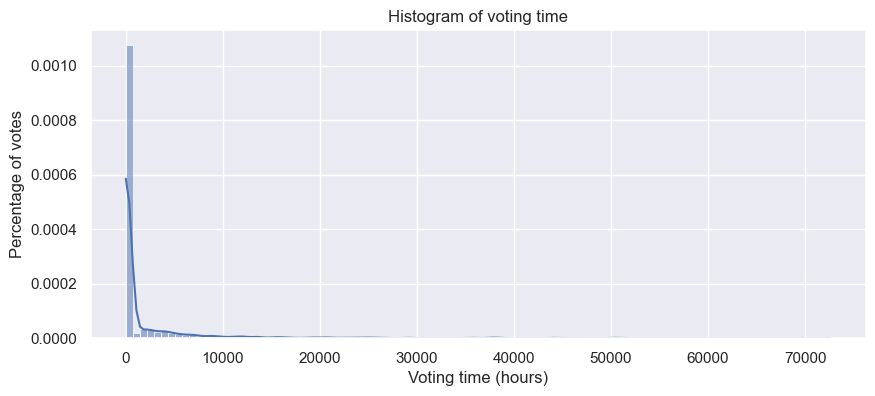

In [111]:
# Plot histogram of voting time
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(data=df_timeserie, x='Voting_time', kde=True, ax=ax, bins=100, stat='density')
ax.set_title('Histogram of voting time')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Percentage of votes')
plt.show()

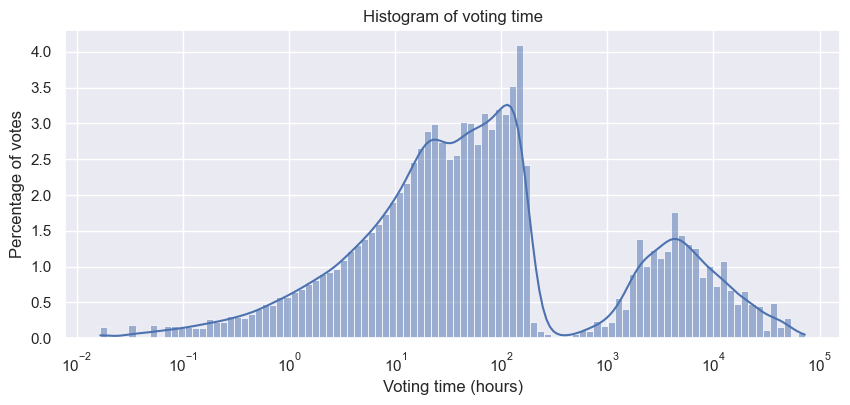

In [112]:
fig, ax = plt.subplots(figsize=(10,4))
kde = sns.histplot(data=df_timeserie, x='Voting_time', kde=True, ax=ax, bins=100, stat='percent', log_scale=(True, False))
ax.set_title('Histogram of voting time')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Percentage of votes')
plt.show()

#### Plot distribution in function of time

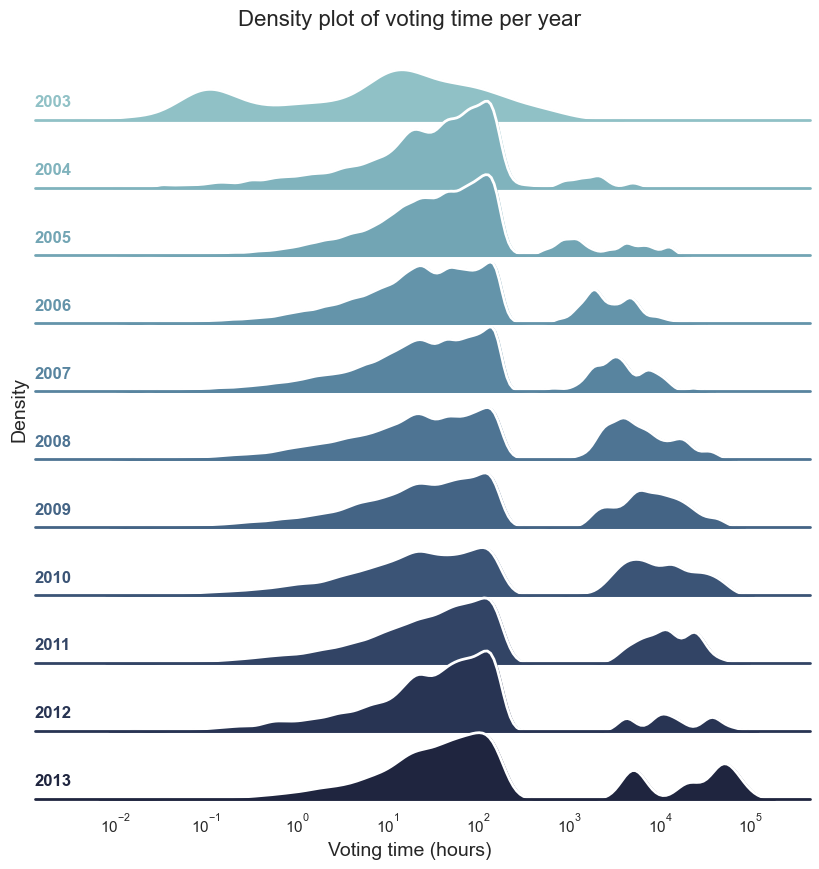

In [113]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(11, rot=-.25, light=.7)
g = sns.FacetGrid(df_timeserie, row='Year', hue='Year', aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'Voting_time', bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5, log_scale=(True, False))
g.map(sns.kdeplot, 'Voting_time', clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
      ax = plt.gca()
      ax.text(0, .2, label, fontweight="bold", color=color,
                  ha="left", va="center", transform=ax.transAxes)

g.map(label, 'Voting_time')

# Set figure properties
#g.fig.set_tight_layout(True)
g.fig.subplots_adjust(hspace=-.25)
g.fig.set_figwidth(10)
g.fig.set_figheight(10)
g.fig.suptitle('Density plot of voting time per year', fontsize=16, y=0.9)
g.fig.supylabel('Density', fontsize=14, x=0.1)
g.fig.supxlabel('Voting time (hours)', fontsize=14, y=0.05)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel='', xlabel='')
g.despine(bottom=True, left=True)

plt.show()
sns.set_theme()

We can first notice that in 2003 the voting time distribution was quite different from the other years. Indeed, the voting times were much more spread out and shifted to the left. This is probably due to the fact that at the creation of election system, the rules were not yet well established so the behaviour of the voters was not very consistent. We will start by checking if the 2003 data represents a significant part of the data. 

In [114]:
portion_2003 = df[df['Year'] == 2003].shape[0] / df.shape[0]
print(f'Portion of 2003 data: {portion_2003:.2%}')

Portion of 2003 data: 0.10%


Knowing that the amount of data for 2003 represents only 0.1% of the total data, we can consider that these data are negligible and we can remove them from the dataset. 

In [115]:
df = df[df['Year'] != 2003]
#df.to_csv('wiki-RfA.csv')
df_timeserie = df_timeserie[df_timeserie['Year'] != 2003]

## Time interval between votes

The bimodal distribution we get when plotting on a log scale was unexpected, thus and to find an explanation to this phenomenon, we can look at the distribution of time intervals between votes:

In [116]:
# Separate the vote for a candidate by elections rounds (i.e. when there is no new vote for a target during 72 hours)
votes_gap = df_timeserie.groupby('Target').Voting_time.apply(lambda x: x.sort_values().diff())
votes_gap 

Target                  
(aeropagitica)    125968          NaN
                  125969     0.350000
                  126007     0.550000
                  125970     0.750000
                  126008     2.533333
                              ...    
Ђорђе Д. Божовић  186715     1.033333
                  186716     6.816667
                  186717    63.050000
                  186703     8.800000
                  186718    22.766667
Name: Voting_time, Length: 185253, dtype: float64

In [117]:
votes_gap.describe()

count    181860.000000
mean         20.299174
std         515.098284
min           0.000000
25%           0.216667
50%           0.716667
75%           2.250000
max       72247.600000
Name: Voting_time, dtype: float64

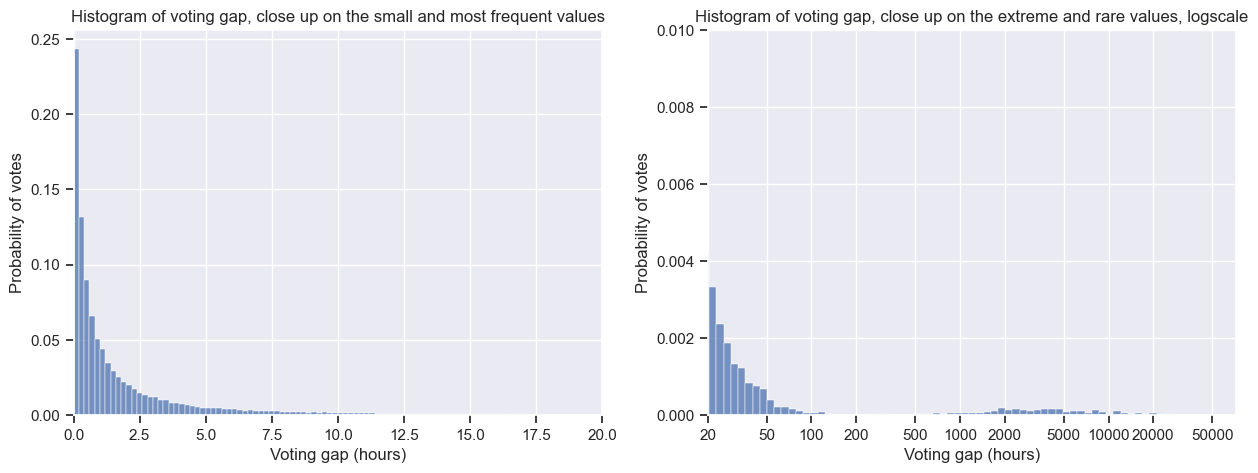

In [118]:
# Plot histogram of voting gap
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=votes_gap, ax=ax[0], stat='probability', bins=100, binrange=(0,20))
ax[0].set_title('Histogram of voting gap, close up on the small and most frequent values')
ax[0].set_xlabel('Voting gap (hours)')
ax[0].set_ylabel('Probability of votes')
ax[0].set_xlim(0, 20)
ax[0].tick_params(bottom=True, left=True)

sns.histplot(data=votes_gap+1, ax=ax[1], stat='probability', bins=100, log_scale=(True, False))
ax[1].set_title('Histogram of voting gap, close up on the extreme and rare values, logscale')
ax[1].set_xlabel('Voting gap (hours)')
ax[1].set_ylabel('Probability of votes')
ax[1].set_xlim(20, np.nanmax(votes_gap))
ax[1].set_ylim(0, 0.01)
ax[1].set_xticks([20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000], labels=['20', '50', '100', '200', '500', '1000', '2000', '5000', '10000', '20000', '50000']) 
ax[1].tick_params(bottom=True, left=True)

plt.show()

In [119]:
# Extract the voting gap correspong to less than 1% of the voting gap
round_gap = votes_gap[votes_gap >= votes_gap.quantile(0.99)].min()
round_gap

26.53333333333333

We can see that the distribution of the time interval between votes almost follows an exponential distribution (which is what we would expect for this type of data). However, we can see that there is an additional very small peak between 1000 and 20000 hours, which reveals the presence of multiple batches/aggregate of votes separated by a long period of time. We interpret this as different rounds of elections. Indeed, some target are not elected at the first try and they run for admin again after a certain period of time. We now want to separate the data into different rounds of elections for each target.

### Separate data into rounds of elections

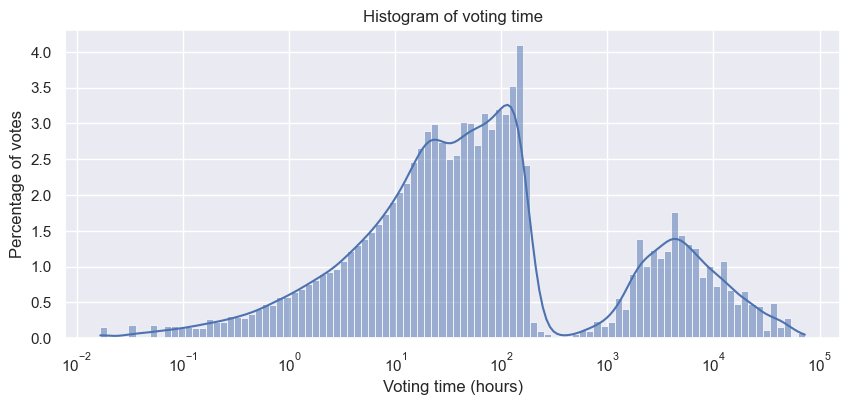

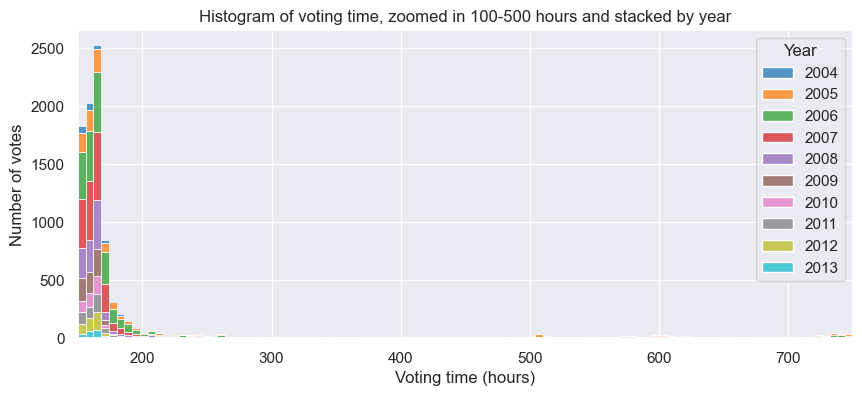

After this threshold in hours, we consider that the incoming votes are part of a new election: 391.11 hours
Percentage of votes happening at this threshold: 0.041%


In [120]:
fig, ax = plt.subplots(figsize=(10,4))
kde = sns.histplot(data=df_timeserie, x='Voting_time', kde=True, ax=ax, bins=100, stat='percent', log_scale=(True, False))
ax.set_title('Histogram of voting time')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Percentage of votes')
plt.show()

# Close up the voting time to 100-500 hours
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(data=df_timeserie, x='Voting_time', ax=ax, bins=100, stat='count', log_scale=(False, False), binrange=(150, 750), hue='Year', palette='tab10', multiple='stack')
ax.set_title('Histogram of voting time, zoomed in 100-500 hours and stacked by year')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Number of votes')
ax.set_xlim(150, 750)
plt.show()

# Fin the local minima
kde = kde.get_lines()[0].get_data()
deriv_kde_sign = np.sign(np.diff(kde[1]))
local_mins = kde[0][np.append((np.roll(deriv_kde_sign, 1) - deriv_kde_sign) != 0, False)]
y_mins = kde[1][np.append((np.roll(deriv_kde_sign, 1) - deriv_kde_sign) != 0, False)]

# only keep the minima with a y value < 0.1 and a x value is between 10 and 1e4
round_threshold = local_mins[(y_mins < 0.1) & (local_mins > 10) & (local_mins < 1e3)][0]
percent_at_threshold = y_mins[(y_mins < 0.1) & (local_mins > 10) & (local_mins < 1e3)][0]

print(f'After this threshold in hours, we consider that the incoming votes are part of a new election: {round_threshold:.2f} hours')
print(f'Percentage of votes happening at this threshold: {percent_at_threshold:.2}%')

To separate the different rounds of elections we focus on the gap between the 2 peaks in the distribution of voting time. First, we can observe that there is a huge drop in the amount of votes at around 170h which is consistent with the information we found on the Wikipedia page about the election duration being approximately 7 days (noting that this period can be prolonged in some cases). 
To find the best threshold to separate the data, we extracted the kernel density estimation of the distribution of voting time and we computed its local minimum in the gap between the 2 peaks and the corresponding voting time. We found that the best threshold to separate the data is 391h. We can now separate the data into different rounds of elections for each target using this threshold.

In [131]:
# Start a new round each time the interval between the current voting and the first voting time of the round is greater than the round threshold
def compute_rounds(data, round_threshold):
    values = data.values
    rounds = [1]
    for i in range(1,len(values)):
        if values[i] > round_threshold:
            rounds.append(rounds[i-1] + 1)
            values = values - values[i]
        else:
            rounds.append(rounds[i-1])

    rounds = pd.Series(rounds, index=data.index).astype(int)
    return rounds

rounds = (df_timeserie.groupby('Target').Voting_time.apply(lambda x: compute_rounds(x, round_threshold))).rename('Round')
df_timeserie2 = df_timeserie.join(rounds.droplevel(0))
df_timeserie2

Target                  
(aeropagitica)    125968    1
                  125969    1
                  125970    1
                  125971    1
                  125972    1
                           ..
Ђорђе Д. Божовић  186714    1
                  186715    1
                  186716    1
                  186717    1
                  186718    1
Name: Round, Length: 185253, dtype: int64

In [132]:
df_timeserie2['Round'].unique()
rounds.unique()

array([1, 2, 3, 4])

In [128]:
for i in range(0, len(df_timeserie2[df_timeserie2['Round'] == 4]), 60):
    display(df_timeserie2[df_timeserie2['Round'] == 4].iloc[i:i+60])

,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round
84260,Balloonman,Wisdom89,1,-1,2008,2008-11-07 16:28:00,'''Beat the nom support... rationale comming s...,9462.883333,4
84261,Nancy,Wisdom89,1,-1,2008,2008-11-07 16:27:00,'''Support''' without hesitation. Wisdom has s...,9462.866667,4
84262,Pedro,Wisdom89,1,-1,2008,2008-11-07 16:28:00,"'''Support''' as nom. <small><span style=""bord...",9462.883333,4
84263,RegentsPark,Wisdom89,1,-1,2008,2008-11-07 16:28:00,'''Support''' 22831 edits over three+ years. A...,9462.883333,4
84264,Useight,Wisdom89,1,-1,2008,2008-11-07 16:29:00,'''Support'''. As nominator.,9462.900000,4
84265,ErikTheBikeMan,Wisdom89,1,-1,2008,2008-11-07 22:20:00,'''Support''' Per first nom.,9468.750000,4
84267,KojiDude,Wisdom89,1,-1,2008,2008-11-07 16:59:00,'''Support''' I'll admit the work at UAA seems...,9463.400000,4
84268,Tinucherian,Wisdom89,1,-1,2008,2008-11-07 17:02:00,'''Very strongggg Support''' : I just couldnt ...,9463.450000,4
84269,Tanthalas39,Wisdom89,1,-1,2008,2008-11-07 17:38:00,'''Strong support'''. Relentless. Positive. Co...,9464.050000,4
84270,Cyclonenim,Wisdom89,1,-1,2008,2008-11-07 17:57:00,'''Strong support''' — No one can doubt this g...,9464.366667,4


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round
84321,Wisdom89,Wisdom89,0,-1,2008,2008-11-07 21:03:00,'''Neutral''' The concerns addressed in his la...,9467.466667,4
84322,Gurch,Wisdom89,0,-1,2008,2008-11-07 22:36:00,Insufficient portal-space edits --,9469.016667,4
84323,IMatthew,Wisdom89,0,-1,2008,2008-11-07 22:38:00,'''Neutral''' I can confirm this (zOMG drama)....,9469.050000,4
84324,Shapiros10,Wisdom89,0,-1,2008,2008-11-07 22:47:00,'''Weak Neutral''' I am as torn as an old pair...,9469.200000,4
84325,Mixwell,Wisdom89,0,-1,2008,2008-11-07 23:17:00,"'''Wait, what?''' Bleh. Blah! Blargh! Obivious...",9469.700000,4
84326,Natsayhi,Wisdom89,0,-1,2008,2008-11-08 04:23:00,'''Netural''' You could just watch his activit...,9474.800000,4
84327,theoneintraining,Wisdom89,0,-1,2008,2008-11-08 05:00:00,"'''Strong Neutral''' I agree with Shapiros10, ...",9475.416667,4
84328,Stifle,Wisdom89,0,-1,2008,2008-11-08 12:40:00,'''Neutral'''. Doesn't fail any of my criteria...,9483.083333,4
125677,Twooars,Wisdom89,1,-1,2007,2007-10-10 16:40:00,'''Support''' The answer to Pedro's question w...,7.083333,4
125678,Nat,Wisdom89,1,-1,2007,2007-10-10 16:47:00,'''Weak Support''' I agree with Phgao that you...,7.200000,4


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round
164979,Guinnog,Pegasus1138,-1,-1,2006,2006-07-27 18:33:00,'''Oppose''' per Crazy Russian and Xoloz. Mayb...,3164.950000,4
164980,Agent 86,Pegasus1138,-1,-1,2006,2006-07-27 19:15:00,'''Weak Oppose'''. I had noticed the optional ...,3165.650000,4
164981,Agent 86,Pegasus1138,0,-1,2006,2006-07-27 19:15:00,<s>'''Neutral'''. Roughly the same amount of t...,3165.650000,4
164982,Stifle,Pegasus1138,0,-1,2006,2006-07-27 10:12:00,'''Neutral''' pending answers to additional qu...,3156.600000,4
164983,Kingboyk,Pegasus1138,0,-1,2006,2006-07-27 10:53:00,"'''Neutral'''. Sitting on the fence for now, m...",3157.283333,4
164984,Kungfuadam,Pegasus1138,0,-1,2006,2006-07-27 12:51:00,"'''Neutral,''' what has changed since the last...",3159.250000,4
164985,Clyde Miller,Pegasus1138,0,-1,2006,2006-07-27 15:42:00,'''Neutral'''- not really sure where to go yet...,3162.100000,4
164986,Deb,Pegasus1138,0,-1,2006,2006-07-27 16:24:00,'''Neutral'''. I would definitely consider vo...,3162.800000,4


In [ ]:
c = df_timeserie2[(df_timeserie2.Target == 'TenPoundHammer') & (df_timeserie2.Source == 'Johnbod')].Comment
for ele in c:
    print(ele)
    print('')

'''Oppose''' per the clear issues recognised by many on both sides above. When a very active specialist is showing weaknesses precisely in the specialised area, it's time to draw back.

'''Oppose''' Too soon since last RfA (and the one before, and....).  Pleasant guy, but too many of his nominations are not well-grounded in policy or are under-researched - I mainly see his Cfd nominations (usually unsuccessful) or Visual arts AfDs.  No heckling please.

'''Oppose''' per pretty consistent concerns of those above, which reflected my impression from my relatively few visits to AfD. Not ready yet; maybe next time.



In [ ]:
all_min = df_timeserie2.groupby(['Target', 'Round']).Date.min()
all_max = df_timeserie2.groupby(['Target', 'Round']).Date.max()
# join min and max date
all_min_max = pd.concat([all_min, all_max], axis=1)
all_min_max.columns = ['Min', 'Max']
# remove the target that don't have a Round >= 1
target_to_keep = all_min_max[all_min_max.index.get_level_values('Round') >= 1].reset_index().Target.unique()
all_min_max = all_min_max[all_min_max.index.get_level_values('Target').isin(target_to_keep)].reset_index()
display(all_min_max)

for row in all_min_max.itertuples():
    print(row.Round, '\t', row.Min, '\t', row.Max)

,Target,Round,Min,Max
0,168...,0,2003-12-01 00:52:00,2003-12-02 15:45:00
1,168...,1,2003-12-05 05:39:00,2003-12-05 05:39:00
2,21655,0,2008-03-17 22:38:00,2008-03-17 23:45:00
3,21655,1,2008-03-19 19:48:00,2008-03-19 19:55:00
4,28bytes,0,2010-12-01 18:35:00,2010-12-03 00:40:00
...,...,...,...,...
3018,Ævar Arnfjörð Bjarmason,0,2004-05-18 13:23:00,2004-05-20 18:30:00
3019,Ævar Arnfjörð Bjarmason,1,2005-10-08 22:44:00,2005-10-13 22:45:00
3020,Ævar Arnfjörð Bjarmason,2,2005-10-15 05:35:00,2005-10-16 00:41:00
3021,Ђорђе Д. Божовић,0,2005-11-26 02:30:00,2005-11-28 00:05:00


0 	 2003-12-01 00:52:00 	 2003-12-02 15:45:00
1 	 2003-12-05 05:39:00 	 2003-12-05 05:39:00
0 	 2008-03-17 22:38:00 	 2008-03-17 23:45:00
1 	 2008-03-19 19:48:00 	 2008-03-19 19:55:00
0 	 2010-12-01 18:35:00 	 2010-12-03 00:40:00
1 	 2011-06-07 14:35:00 	 2011-06-11 16:06:00
2 	 2011-06-12 21:49:00 	 2011-06-14 10:05:00
0 	 2009-08-14 06:00:00 	 2009-08-21 06:15:00
1 	 2010-05-29 08:07:00 	 2010-06-05 03:05:00
0 	 2005-12-20 16:49:00 	 2005-12-22 00:16:00
1 	 2006-06-08 23:22:00 	 2006-06-10 16:55:00
0 	 2005-10-06 05:28:00 	 2005-10-08 22:46:00
1 	 2006-04-02 06:05:00 	 2006-04-09 05:02:00
0 	 2005-09-24 09:49:00 	 2005-09-27 17:28:00
1 	 2005-09-29 07:35:00 	 2005-09-29 07:35:00
2 	 2005-09-30 20:38:00 	 2005-09-30 22:52:00
0 	 2005-03-18 19:59:00 	 2005-03-20 08:42:00
1 	 2005-03-21 18:09:00 	 2005-03-22 20:45:00
2 	 2005-03-24 17:32:00 	 2005-03-25 17:17:00
3 	 2005-03-26 22:14:00 	 2005-03-26 22:14:00
4 	 2005-03-28 18:05:00 	 2005-04-01 22:11:00
0 	 2005-01-17 02:47:00 	 2005-01-

In [ ]:
1


In [ ]:
df_timeserie2[(df_timeserie2.Target == 'TenPoundHammer') & (df_timeserie2.Round == 0)]

,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round
123427,Arkyan,TenPoundHammer,1,-1,2007,2007-05-21 02:57:00,'''Support'''. Have had a number of positive ...,0.250000,0
123428,Krimpet,TenPoundHammer,1,-1,2007,2007-05-21 03:15:00,"'''Support'''. Positive contributions, and his...",0.550000,0
123429,Cometstyles,TenPoundHammer,1,-1,2007,2007-05-21 04:38:00,'''Support''' - for high mainspace contributio...,1.933333,0
123430,G1ggy,TenPoundHammer,1,-1,2007,2007-05-21 04:40:00,'''[[Supermassive Black Hole|Supermassive]] Su...,1.966667,0
123431,YechielMan,TenPoundHammer,1,-1,2007,2007-05-21 05:16:00,"'''Support''' I've seen him around on AFD, and...",2.566667,0
123432,Madman bum and angel,TenPoundHammer,1,-1,2007,2007-05-21 12:42:00,'''Support''' &ndash; He's already shown his w...,10.000000,0
123433,GDonato,TenPoundHammer,1,-1,2007,2007-05-21 14:10:00,"'''Support''' per good mainspace contribs, wou...",11.466667,0
123434,Walton monarchist89,TenPoundHammer,1,-1,2007,2007-05-21 16:53:00,'''Support''' - I looked at the AfD cited in Q...,14.183333,0
123435,Thunderwing,TenPoundHammer,1,-1,2007,2007-05-21 20:46:00,'''Support'''- good work on [[WP:AFD]],18.066667,0
123436,Matt Yeager,TenPoundHammer,1,-1,2007,2007-05-21 22:28:00,'''Easy support'''. Someone who cares most abo...,19.766667,0


In [ ]:
c = df_timeserie2[df_timeserie2.Round == 7].Comment
c = df_timeserie2[df_timeserie2.Target == 'Guanaco'].Vote.value_counts()
d = df_timeserie2[df_timeserie2.Target == 'Guanaco'].Results.value_counts()
c, d
c = df_timeserie2[(df_timeserie2.Target == 'Guanaco') & (df_timeserie2.Results == 1)]
display(c[30:90])

,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round
135772,Hiding,Guanaco,1,1,2006,2006-02-05 16:42:00,"'''Support''', work at the Mediation Commitee ...",15304.566667,6
135773,Giano,Guanaco,1,1,2006,2006-02-05 19:44:00,'''Support'''. He's been contributing here for...,15307.600000,6
135774,Encyclopedist,Guanaco,1,1,2006,2006-02-05 21:48:00,'''SuperBowl Sunday Support''' [[Image:SuperBo...,15309.666667,6
135775,Tony Sidaway,Guanaco,1,1,2006,2006-02-05 22:10:00,NaN,15310.033333,6
135776,Duk,Guanaco,1,1,2006,2006-02-06 05:06:00,'''Support''' --,15316.966667,6
135777,TantalumTelluride,Guanaco,1,1,2006,2006-02-06 05:11:00,'''Support'''. --,15317.050000,6
135779,Netoholic,Guanaco,1,1,2006,2006-02-06 06:37:00,"'''Support''', as before. --",15318.483333,6
135780,Sjakkalle,Guanaco,1,1,2006,2006-02-06 07:26:00,'''Support'''. I think Guanaco has learned.,15319.300000,6
135781,Siva1979,Guanaco,1,1,2006,2006-02-06 07:29:00,'''Support''' No problems here. Deserves to be...,15319.350000,6
135782,JIP,Guanaco,1,1,2006,2006-02-06 07:48:00,"'''Support''', I agree, no problems here.",15319.666667,6


In [ ]:
df_timeserie

## Vote evolution through time

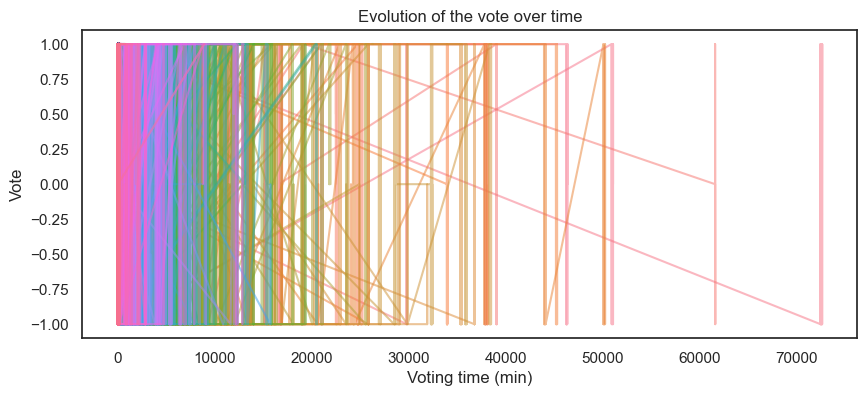

In [ ]:
# Plot the evolution of 'Vote' over 'Voting_time'
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=df_timeserie, x='Voting_time', y='Vote', hue='Target', legend=False, ax=ax, alpha=0.5)
ax.set_title('Evolution of the vote over time')
ax.set_xlabel('Voting time (min)')
ax.set_ylabel('Vote')
plt.show()